In [1]:
import pandas as pd

In [2]:
data_seen = pd.read_csv("data/train.csv")
data_unseen = pd.read_csv("data/test.csv")

In [3]:
train_cols = ['LotArea', 'OverallQual', 'YearBuilt','YearRemodAdd', 'TotRmsAbvGrd','GrLivArea', 'GarageCars','TotalBsmtSF','ExterQual','BsmtQual','SalePrice']
predictor_cols = ['LotArea', 'OverallQual', 'YearBuilt','YearRemodAdd', 'TotRmsAbvGrd','GrLivArea', 'GarageCars','TotalBsmtSF','ExterQual','BsmtQual']
data_seen = data_seen [train_cols]
data_unseen=data_unseen[predictor_cols]


In [4]:
data_seen.describe(include = "all")

,LotArea,OverallQual,YearBuilt,YearRemodAdd,TotRmsAbvGrd,GrLivArea,GarageCars,TotalBsmtSF,ExterQual,BsmtQual,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1423,1460.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,TA,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,906,649,NaN
mean,10516.828082,6.099315,1971.267808,1984.865753,6.517808,1515.463699,1.767123,1057.429452,NaN,NaN,180921.195890
std,9981.264932,1.382997,30.202904,20.645407,1.625393,525.480383,0.747315,438.705324,NaN,NaN,79442.502883
min,1300.000000,1.000000,1872.000000,1950.000000,2.000000,334.000000,0.000000,0.000000,NaN,NaN,34900.000000
25%,7553.500000,5.000000,1954.000000,1967.000000,5.000000,1129.500000,1.000000,795.750000,NaN,NaN,129975.000000
50%,9478.500000,6.000000,1973.000000,1994.000000,6.000000,1464.000000,2.000000,991.500000,NaN,NaN,163000.000000
75%,11601.500000,7.000000,2000.000000,2004.000000,7.000000,1776.750000,2.000000,1298.250000,NaN,NaN,214000.000000


In [6]:
from pycaret.regression import *
setting_up = setup(data = data_seen, target = 'SalePrice', 
                   feature_selection = True,feature_selection_threshold=0.5, 
                   remove_multicollinearity = True, multicollinearity_threshold = 0.6,
                  numeric_imputation = "median",
                  categorical_imputation = "mode",
                   remove_outliers = True,
                  feature_interaction = True, 
                   feature_ratio = True,
                   ignore_low_variance = True,
                   log_experiment = True, 
                   experiment_name = 'price'
                  )

 
Setup Succesfully Completed.


,Description,Value
0,session_id,3425
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1460, 11)"
4,Missing Values,True
5,Numeric Features,5
6,Categorical Features,5
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [7]:
setting_up[0].head()

,OverallQual_5,BsmtQual_Ex,GrLivArea,ExterQual_TA,OverallQual_8,GarageCars_3,OverallQual_7,OverallQual_6,OverallQual_9,ExterQual_Ex,...,YearRemodAdd,TotRmsAbvGrd_10,GarageCars_0,GarageCars_1,LotArea,YearRemodAdd_multiply_GrLivArea,GrLivArea_multiply_TotalBsmtSF,GrLivArea_multiply_LotArea,TotalBsmtSF_multiply_GrLivArea,LotArea_multiply_GrLivArea
0,0.0,0.0,1710.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2003.0,0.0,0.0,0.0,8450.0,3425130.0,1463760.0,14449500.0,1463760.0,14449500.0
1,0.0,0.0,1262.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1976.0,0.0,0.0,0.0,9600.0,2493712.0,1592644.0,12115200.0,1592644.0,12115200.0
2,0.0,0.0,1786.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2002.0,0.0,0.0,0.0,11250.0,3575572.0,1643120.0,20092500.0,1643120.0,20092500.0
3,0.0,0.0,1717.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1970.0,0.0,0.0,0.0,9550.0,3382490.0,1298052.0,16397350.0,1298052.0,16397350.0
4,0.0,0.0,2198.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,2000.0,0.0,0.0,0.0,14260.0,4396000.0,2516710.0,31343480.0,2516710.0,31343480.0


In [8]:
top5 = compare_models(n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,CatBoost Regressor,16742.6282,527664110.1288,22820.7407,0.8750,0.1354,0.1020,1.7127
1,Gradient Boosting Regressor,17399.1701,556936376.0366,23412.8801,0.8691,0.1396,0.1069,0.1788
2,Linear Regression,17707.6018,592919396.1780,24215.2498,0.8596,0.1421,0.1091,0.0030
3,Ridge Regression,17742.1699,592614772.0723,24208.3023,0.8596,0.1425,0.1096,0.0033
4,Random Forest,17779.8295,595390344.4081,24235.0818,0.8587,0.1441,0.1098,0.2492
5,Random Sample Consensus,17620.0422,604322741.4001,24397.4643,0.8577,0.1420,0.1082,0.0823
6,Light Gradient Boosting Machine,17966.5929,608502056.4127,24507.3573,0.8553,0.1428,0.1087,0.0848
7,Lasso Regression,18085.4963,616391056.1462,24693.5551,0.8545,0.1437,0.1110,0.0156
8,Extra Trees Regressor,17666.0325,618649611.3649,24675.2760,0.8532,0.1402,0.1059,0.1418
9,Extreme Gradient Boosting,18484.2970,660490153.8513,25571.1696,0.8424,0.1525,0.1116,0.1857


In [9]:
top5

 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.1, loss='ls', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=3425, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=False),
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)]

In [10]:
model = [tune_model(i,fold =5, round =2, optimize = 'RMSE' ) for i in top5]
#,n_iter =100

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,17018.53,588745572.66,24264.08,0.86,0.13,0.10
1,18782.54,660664110.16,25703.39,0.87,0.14,0.11
2,16841.48,496906052.06,22291.39,0.86,0.14,0.11
3,17997.33,601944903.73,24534.57,0.87,0.14,0.11
4,17521.53,613156788.42,24762.00,0.84,0.15,0.11
Mean,17632.28,592283485.40,24311.09,0.86,0.14,0.11
SD,702.95,53505736.60,1120.10,0.01,0.01,0.00


In [11]:
model

 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.37, loss='lad',
                           max_depth=70, max_features='sqrt',
                           max_leaf_nodes=None, min_impurity_decrease=0.0,
                           min_impurity_split=None, min_samples_leaf=7,
                           min_samples_split=4, min_weight_fraction_leaf=0.0,
                           n_estimators=70, n_iter_no_change=None,
                           presort='deprecated', random_state=3425,
                           subsample=0.9, tol=0.0001, validation_fraction=0.1,
                           verbose=0, warm_start=False),
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)]

In [12]:
xgboost = create_model('xgboost')
stacker = stack_models(model, meta_model = xgboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,20312.3218,807478278.4573,28416.1623,0.8414,0.1475,0.1091
1,16878.0904,614223084.9944,24783.5245,0.7979,0.1419,0.1041
2,15590.3566,468140659.8468,21636.5584,0.8898,0.1131,0.0861
3,21529.1125,780097438.7195,27930.2245,0.8669,0.1452,0.1176
4,16908.3249,502512324.5927,22416.7867,0.8607,0.1355,0.1044
5,17295.4141,539868709.6154,23235.0750,0.8536,0.1540,0.1219
6,18607.3605,702602467.9546,26506.6495,0.8506,0.1403,0.1091
7,18793.5402,647648433.9277,25448.9378,0.8571,0.1439,0.1057
8,18242.9668,736979396.1008,27147.3644,0.8405,0.1702,0.1124
9,15856.4664,434205027.4996,20837.5869,0.8658,0.1301,0.0986


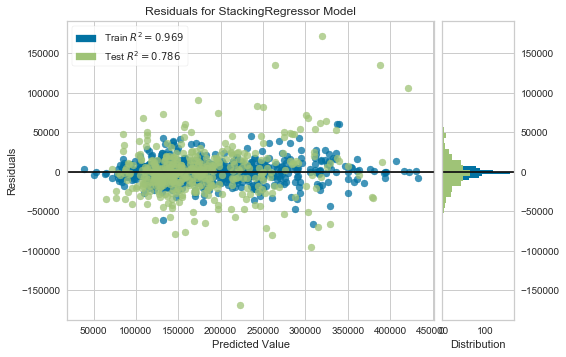

In [13]:
plot_model(stacker)
#'learning'

In [14]:
final = finalize_model(stacker)
unseen_predictions = predict_model(final, data=data_unseen)
unseen_predictions.head()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,TotRmsAbvGrd,GrLivArea,GarageCars,TotalBsmtSF,ExterQual,BsmtQual,Label
index,,,,,,,,,,,
0,11622,5,1961,1961,5,896,1.0,882.0,TA,TA,134427.578125
1,14267,6,1958,1958,6,1329,1.0,1329.0,TA,TA,163750.250000
2,13830,5,1997,1998,6,1629,2.0,928.0,TA,Gd,184425.656250
3,9978,6,1998,1998,7,1604,2.0,926.0,TA,TA,173799.593750
4,5005,8,1992,1992,5,1280,2.0,1280.0,Gd,Gd,199168.187500


In [15]:
save_model(final,'Final_model')

Transformation Pipeline and Model Succesfully Saved
